In [1]:
import os as os
import pickle as pkl
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats


In [2]:
# from pydeseq2.utils import load_example_data

SAVE = True  # whether to save the outputs of this notebook

if SAVE:
    # Replace this with the path to directory where you would like results to be
    # saved
    OUTPUT_PATH = "/Users/xihan/Downloads/laboratory_biological_data_mining/data/output"
    os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist

In [11]:
#get data from the unnormalized_count of rna
df_raw_counts = pd.read_csv('/Users/xihan/Downloads/laboratory_biological_data_mining/data/GLDS-48_rna_seq_Unnormalized_Counts.csv',header=0)

# Transpose the DataFrame
df_transposed = df_raw_counts.transpose()

# Make the first row the new header
new_header = df_transposed.iloc[0]  # Grab the first row for the header
df_transposed = df_transposed[1:]  # Take the data minus the header row
df_transposed.columns = new_header  # Set the header row as the df header)

In [12]:
df_transposed

Unnamed: 0,ENSMUSG00000000001,ENSMUSG00000000003,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,...,ENSMUSG00000118384,ENSMUSG00000118385,ENSMUSG00000118386,ENSMUSG00000118387,ENSMUSG00000118388,ENSMUSG00000118389,ENSMUSG00000118390,ENSMUSG00000118391,ENSMUSG00000118392,ENSMUSG00000118393
Mmus_C57-6J_LVR_FLT_C_Rep1_M25,1255.0,0.0,12.0,10.0,0.0,32753.0,377.0,40.0,317.0,137.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mmus_C57-6J_LVR_FLT_C_Rep2_M26,1297.0,0.0,11.0,19.0,0.0,31585.0,166.0,55.0,398.0,152.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Mmus_C57-6J_LVR_FLT_C_Rep3_M27,1636.0,0.0,14.0,18.0,2.0,49649.0,285.0,40.0,340.0,141.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mmus_C57-6J_LVR_FLT_C_Rep4_M28,1263.0,0.0,14.0,8.0,3.0,38397.0,292.0,27.0,398.0,199.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mmus_C57-6J_LVR_FLT_C_Rep5_M30,1153.0,0.0,16.0,3.0,3.0,35106.0,376.0,19.0,252.0,147.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mmus_C57-6J_LVR_FLT_I_Rep1_M21,3721.0,0.0,49.0,2314.0,5.0,69629.0,918.0,314.0,1194.0,489.0,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mmus_C57-6J_LVR_FLT_I_Rep2_M22,1739.0,0.0,16.0,29.0,1.0,57476.0,642.0,45.0,290.0,228.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Mmus_C57-6J_LVR_GC_C_Rep1_M36,1358.0,0.0,13.0,15.0,2.0,48164.0,502.0,62.0,390.0,148.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Mmus_C57-6J_LVR_GC_C_Rep2_M37,1043.0,0.0,10.0,12.0,1.0,40069.0,618.0,28.0,280.0,146.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mmus_C57-6J_LVR_GC_C_Rep3_M38,1768.0,0.0,36.0,9.0,0.0,54375.0,742.0,67.0,452.0,180.0,...,10.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# we filter out genes that have less than 10 read counts in total. Note again that there are no such genes in this synthetic dataset


In [18]:
genes_to_keep = df_transposed.columns[df_transposed.sum(axis=0) >= 10]
df_transposed = df_transposed[genes_to_keep]

In [7]:
metadata_space = pd.read_excel('/Users/xihan/Downloads/laboratory_biological_data_mining/data/meta_data_space.xlsx')

In [19]:
df_transposed

Unnamed: 0,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,...,ENSMUSG00000118310,ENSMUSG00000118312,ENSMUSG00000118332,ENSMUSG00000118345,ENSMUSG00000118346,ENSMUSG00000118353,ENSMUSG00000118366,ENSMUSG00000118383,ENSMUSG00000118384,ENSMUSG00000118386
Mmus_C57-6J_LVR_FLT_C_Rep1_M25,1255,12,10,0,32753,377,40,317,137,2506,...,1,0,40,3,278,162,1641,2,1,0
Mmus_C57-6J_LVR_FLT_C_Rep2_M26,1297,11,19,0,31585,166,55,398,152,2432,...,1,5,148,0,230,117,1252,3,6,0
Mmus_C57-6J_LVR_FLT_C_Rep3_M27,1636,14,18,2,49649,285,40,340,141,4282,...,0,0,75,4,286,155,1682,4,2,0
Mmus_C57-6J_LVR_FLT_C_Rep4_M28,1263,14,8,3,38397,292,27,398,199,2803,...,6,0,136,2,260,165,1782,4,4,2
Mmus_C57-6J_LVR_FLT_C_Rep5_M30,1153,16,3,3,35106,376,19,252,147,2485,...,0,0,91,1,242,142,1789,3,0,5
Mmus_C57-6J_LVR_FLT_I_Rep1_M21,3721,49,2314,5,69629,918,314,1194,489,4276,...,0,0,215,26,392,117,2634,140,0,2
Mmus_C57-6J_LVR_FLT_I_Rep2_M22,1739,16,29,1,57476,642,45,290,228,3828,...,0,0,238,21,262,125,1789,6,1,3
Mmus_C57-6J_LVR_GC_C_Rep1_M36,1358,13,15,2,48164,502,62,390,148,4415,...,1,0,89,5,306,103,1529,8,0,1
Mmus_C57-6J_LVR_GC_C_Rep2_M37,1043,10,12,1,40069,618,28,280,146,3126,...,1,0,86,17,245,182,1692,8,0,2
Mmus_C57-6J_LVR_GC_C_Rep3_M38,1768,36,9,0,54375,742,67,452,180,4341,...,0,5,140,8,307,249,1973,3,10,5


In [8]:
metadata_space

,sample,condition,group
0,Mmus_C57-6J_LVR_GC_C_Rep1_M36,GC,GC
1,Mmus_C57-6J_LVR_GC_C_Rep2_M37,GC,GC
2,Mmus_C57-6J_LVR_GC_C_Rep3_M38,GC,GC
3,Mmus_C57-6J_LVR_GC_C_Rep4_M39,GC,GC
4,Mmus_C57-6J_LVR_GC_C_Rep5_M40,GC,GC
5,Mmus_C57-6J_LVR_FLT_C_Rep1_M25,FLT,FLT
6,Mmus_C57-6J_LVR_FLT_C_Rep2_M26,FLT,FLT
7,Mmus_C57-6J_LVR_FLT_C_Rep3_M27,FLT,FLT
8,Mmus_C57-6J_LVR_FLT_C_Rep4_M28,FLT,FLT
9,Mmus_C57-6J_LVR_FLT_C_Rep5_M30,FLT,FLT


In [9]:
# set the order of sample the same as in the dataframe: df_transposed
metadata_space.set_index('sample', inplace=True)

# Now reindex metadata_space to match the index of df_transposed
metadata_space = metadata_space.reindex(df_transposed.index)

# If there are any sample names in df_transposed that are not in metadata_space,
# this will result in NaN values in the reindexed metadata_space
#  fill NaNs with a placeholder value or drop these rows and this will in general not happen

metadata_space.fillna('unknown', inplace=True)

In [10]:
metadata_space

,condition,group
Mmus_C57-6J_LVR_FLT_C_Rep1_M25,FLT,FLT
Mmus_C57-6J_LVR_FLT_C_Rep2_M26,FLT,FLT
Mmus_C57-6J_LVR_FLT_C_Rep3_M27,FLT,FLT
Mmus_C57-6J_LVR_FLT_C_Rep4_M28,FLT,FLT
Mmus_C57-6J_LVR_FLT_C_Rep5_M30,FLT,FLT
Mmus_C57-6J_LVR_FLT_I_Rep1_M21,FLT,FLT
Mmus_C57-6J_LVR_FLT_I_Rep2_M22,FLT,FLT
Mmus_C57-6J_LVR_GC_C_Rep1_M36,GC,GC
Mmus_C57-6J_LVR_GC_C_Rep2_M37,GC,GC
Mmus_C57-6J_LVR_GC_C_Rep3_M38,GC,GC


In [13]:
#to check if the order of samples from two data frame match:
if not df_transposed.index.equals(metadata_space.index):
    print("Indices do not match. Aligning them...")

    # If they don't match, one way to align them is to set the index of metadata_space to match that of df_transposed
    metadata_space = metadata_space.reindex(df_transposed.index)

    # Now, check if the reindexing was successful
    if df_transposed.index.equals(metadata_space.index):
        print("Indices are now aligned.")
    else:
        print("Reindexing failed. There might be sample names in counts that are not in metadata.")


In [ ]:
metadata_space

In [20]:
df_transposed = df_transposed.astype(int)
# Read counts modeling with the DeseqDataSet class
dds_space = DeseqDataSet(
    counts=df_transposed,
    metadata=metadata_space,
    design_factors="condition",  # compare samples based on the "condition"
    # column ("B" vs "GC")
    refit_cooks=True,
    n_cpus=8,
)

In [ ]:
dds_space.fit_size_factors()

dds_space.obsm["size_factors"]

In [ ]:
dds_space.fit_genewise_dispersions()

dds_space.varm["genewise_dispersions"]

In [ ]:
dds_space.fit_dispersion_trend()
dds_space.uns["trend_coeffs"]
dds_space.varm["fitted_dispersions"]

In [ ]:
dds_space.fit_dispersion_prior()
print(
    f"logres_prior={dds_space.uns['_squared_logres']}, sigma_prior={dds_space.uns['prior_disp_var']}"
)

In [ ]:
dds_space.fit_LFC()
dds_space.varm["LFC"]

In [ ]:
dds_space.calculate_cooks()
if dds_space.refit_cooks:
    # Replace outlier counts
    dds_space.refit()

In [ ]:
if SAVE:
    with open(os.path.join(OUTPUT_PATH, "dds_space_detailed_pipe.pkl"), "wb") as f:
        pkl.dump(dds_space, f)

In [ ]:
stat_res_space = DeseqStats(dds_space, alpha=0.05, cooks_filter=True, independent_filter=True)

In [ ]:
stat_res_space.run_wald_test()
stat_res_space.p_values

In [ ]:
if stat_res_space.cooks_filter:
    stat_res_space._cooks_filtering()
stat_res_space.p_values

In [ ]:
if stat_res_space.independent_filter:
    stat_res_space._independent_filtering()
else:
    stat_res_space._p_value_adjustment()

stat_res_space.padj


In [ ]:
stat_res_space.summary()

In [ ]:
stat_res_space.lfc_shrink(coeff="condition_GC_vs_FLT")

In [21]:
dds_space.deseq2()


if SAVE:
    with open(os.path.join(OUTPUT_PATH, "dds_space.pkl"), "wb") as f:
        pkl.dump(dds_space, f)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 1.23 seconds.

Fitting dispersion trend curve...
... done in 2.56 seconds.

Fitting MAP dispersions...
... done in 1.48 seconds.

Fitting LFCs...
... done in 0.92 seconds.

Refitting 1240 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.14 seconds.

Fitting MAP dispersions...
... done in 0.09 seconds.

Fitting LFCs...
... done in 0.06 seconds.



In [17]:
print(dds_space)

AnnData object with n_obs × n_vars = 14 × 55536
    obs: 'condition', 'group'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'


In [22]:
print(dds_space.varm["LFC"])

                    intercept  condition_GC_vs_FLT
Unnamed: 0                                        
ENSMUSG00000000001   7.431894            -0.006365
ENSMUSG00000000028   2.893324             0.164159
ENSMUSG00000000031   2.855680             0.001097
ENSMUSG00000000037   0.658545            -0.585877
ENSMUSG00000000049  10.741673             0.041691
...                       ...                  ...
ENSMUSG00000118353   5.046282            -0.065685
ENSMUSG00000118366   7.538845             0.093889
ENSMUSG00000118383   1.538039             0.732146
ENSMUSG00000118384   0.818256             0.024710
ENSMUSG00000118386   0.595673            -0.022982

[22394 rows x 2 columns]


In [25]:
# Statistical analysis with the DeseqStats class
stat_res_space = DeseqStats(dds_space, alpha=0.05, cooks_filter=True, independent_filter=True)


In [26]:
# Wald test
stat_res_space.summary()

if SAVE:
    with open(os.path.join(OUTPUT_PATH, "stat_res_space.pkl"), "wb") as f:
        pkl.dump(stat_res_space, f)

Running Wald tests...


Log2 fold change & Wald test p-value: condition GC vs FLT


... done in 0.83 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Unnamed: 0,,,,,,
ENSMUSG00000000001,1683.164290,-0.009182,0.172702,-0.053169,0.957597,0.997788
ENSMUSG00000000028,19.426066,0.236832,0.333144,0.710900,0.477146,0.997788
ENSMUSG00000000031,17.474754,0.001582,0.389291,0.004064,0.996757,0.999714
ENSMUSG00000000037,1.497241,-0.845242,0.946759,-0.892774,0.371978,NaN
ENSMUSG00000000049,47228.032059,0.060147,0.127889,0.470307,0.638135,0.997788
...,...,...,...,...,...,...
ENSMUSG00000118353,150.738227,-0.094763,0.353423,-0.268129,0.788600,0.997788
ENSMUSG00000118366,1972.499757,0.135454,0.130820,1.035423,0.300471,0.997788
ENSMUSG00000118383,7.467626,1.056264,0.658654,1.603670,0.108787,0.862494


Running Wald tests...


Log2 fold change & Wald test p-value: condition GC vs FLT


... done in 0.70 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Unnamed: 0,,,,,,
ENSMUSG00000000001,1683.164290,-0.009182,0.172702,0.000000,1.000000,1.0
ENSMUSG00000000028,19.426066,0.236832,0.333144,0.410729,0.681271,1.0
ENSMUSG00000000031,17.474754,0.001582,0.389291,0.000000,1.000000,1.0
ENSMUSG00000000037,1.497241,-0.845242,0.946759,-0.787151,0.431194,1.0
ENSMUSG00000000049,47228.032059,0.060147,0.127889,0.000000,1.000000,1.0
...,...,...,...,...,...,...
ENSMUSG00000118353,150.738227,-0.094763,0.353423,0.000000,1.000000,1.0
ENSMUSG00000118366,1972.499757,0.135454,0.130820,0.271013,0.786381,1.0
ENSMUSG00000118383,7.467626,1.056264,0.658654,1.451845,0.146545,1.0


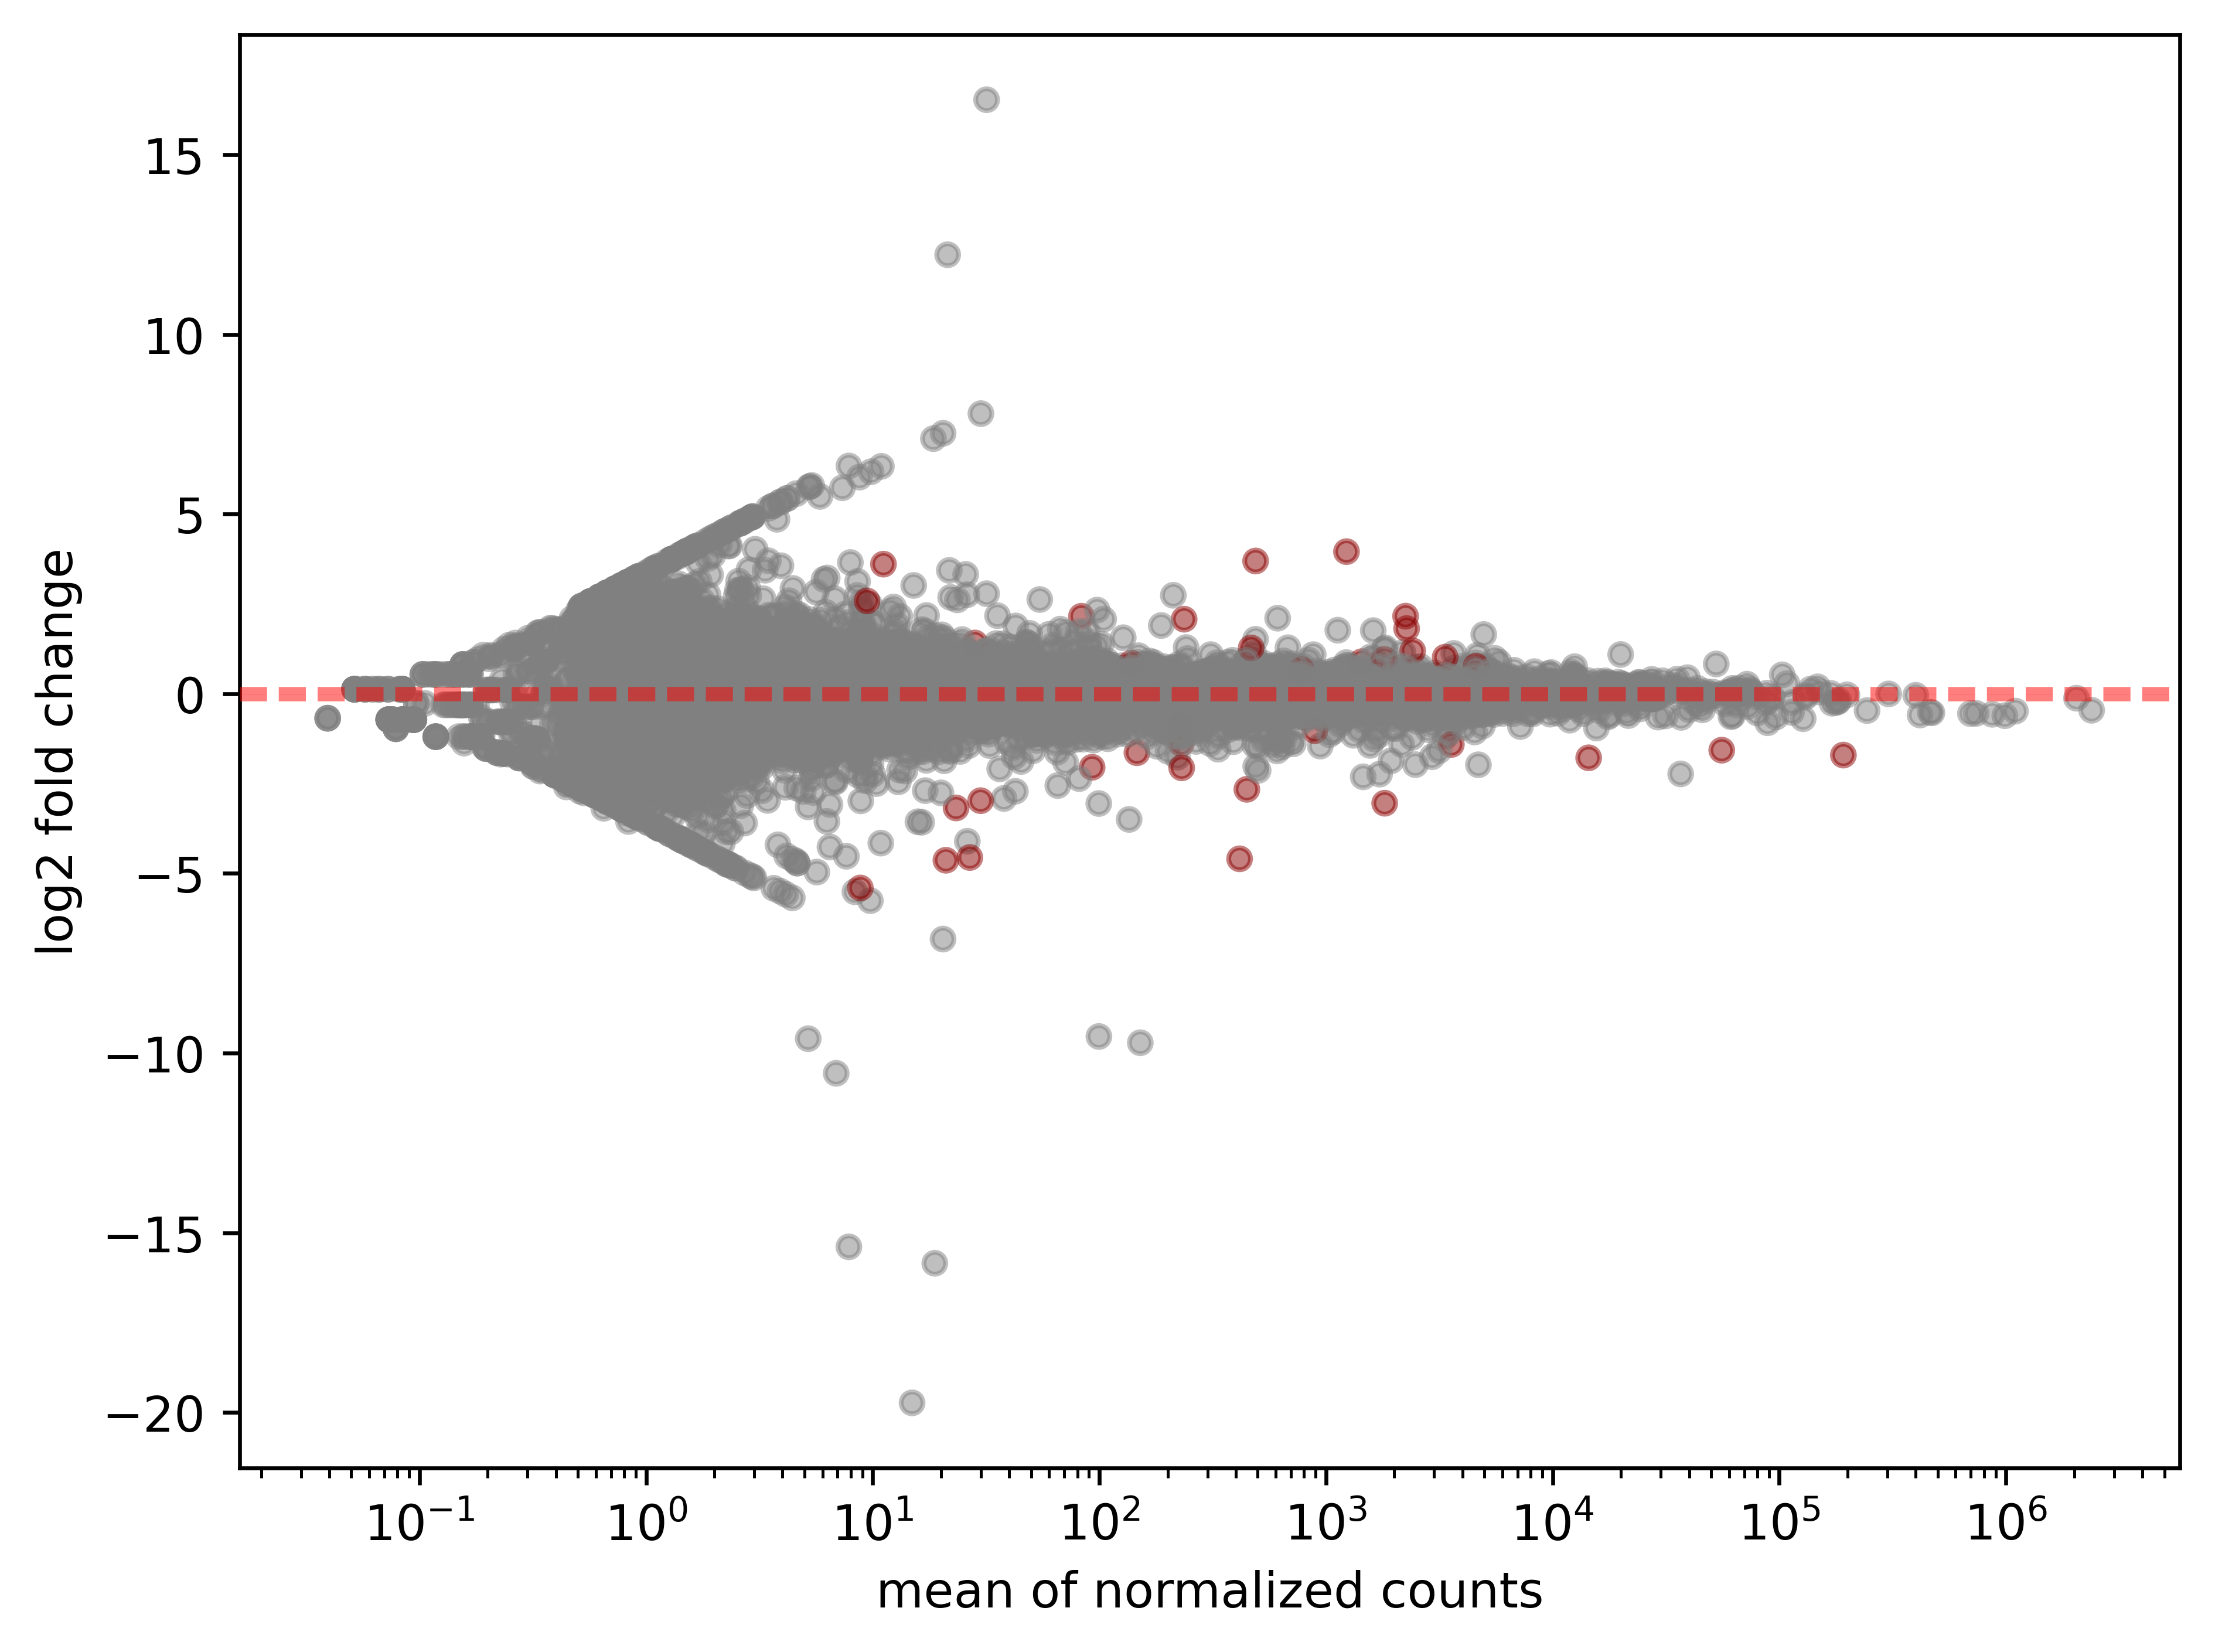

In [27]:
stat_res_space.summary(lfc_null=0.1, alt_hypothesis="greaterAbs")
stat_res_space.plot_MA(s=20)

In [28]:
stat_res_space.lfc_shrink(coeff="condition_GC_vs_FLT")

if SAVE:
    with open(os.path.join(OUTPUT_PATH, "shrunk_stat_results.pkl"), "wb") as f:
        pkl.dump(stat_res_space, f)

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition GC vs FLT


... done in 1.30 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Unnamed: 0,,,,,,
ENSMUSG00000000001,1683.164290,-0.005097,0.166256,0.000000,1.000000,1.0
ENSMUSG00000000028,19.426066,0.153358,0.299045,0.410729,0.681271,1.0
ENSMUSG00000000031,17.474754,2.214577,0.347313,0.000000,1.000000,1.0
ENSMUSG00000000037,1.497241,-0.155971,0.526035,-0.787151,0.431194,1.0
ENSMUSG00000000049,47228.032059,0.104563,0.127613,0.000000,1.000000,1.0
...,...,...,...,...,...,...
ENSMUSG00000118353,150.738227,-0.056364,0.307101,0.000000,1.000000,1.0
ENSMUSG00000118366,1972.499757,0.119458,0.128369,0.271013,0.786381,1.0
ENSMUSG00000118383,7.467626,-0.186725,0.451863,1.451845,0.146545,1.0


In [30]:
print(stat_res_space.shrunk_LFCs)

True
